In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

https://www.kaggle.com/datasets/sh6147782/winequalityred

In [2]:
dataset=pd.read_csv('../Database/winequality-red.csv')
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

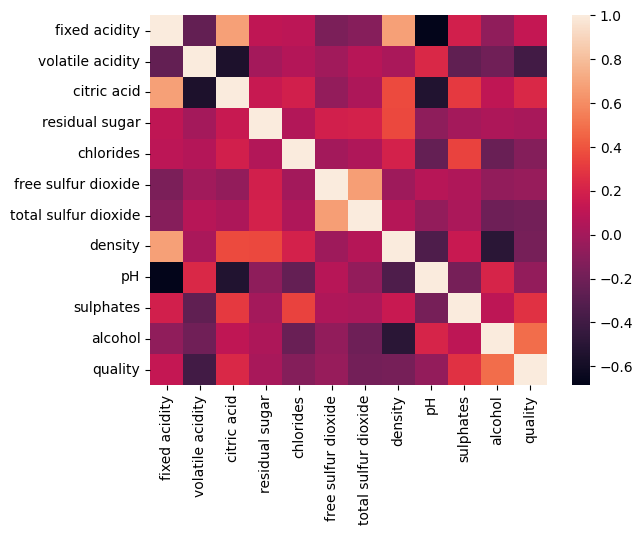

In [5]:
sns.heatmap(dataset.corr())

In [16]:
dataset2=dataset.drop(['fixed acidity','free sulfur dioxide','citric acid'] , axis=1)
x=dataset2.drop('quality',axis=1)
y=dataset2['quality']

In [17]:
dataset2

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1591,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1592,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1593,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1594,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
from sklearn.preprocessing import LabelEncoder
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=1)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
model.score(x_train,y_train)

1.0

In [26]:
pred_train=model.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrix (y_train, pred_train)

array([[  8,   0,   0,   0,   0,   0],
       [  0,  38,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0],
       [  0,   0,   0, 482,   0,   0],
       [  0,   0,   0,   0, 155,   0],
       [  0,   0,   0,   0,   0,  14]], dtype=int64)

In [27]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
data = load_iris()
x_train, x_test, y_train, y_test=train_test_split(data.data,data.target,test_size=0.2)

NVG=GaussianNB()
NVG.fit(x_train,y_train)

GaussianNB()

EI score de la precision es de 0.9


Text(0.5, 23.52222222222222, 'Valor Predecido')

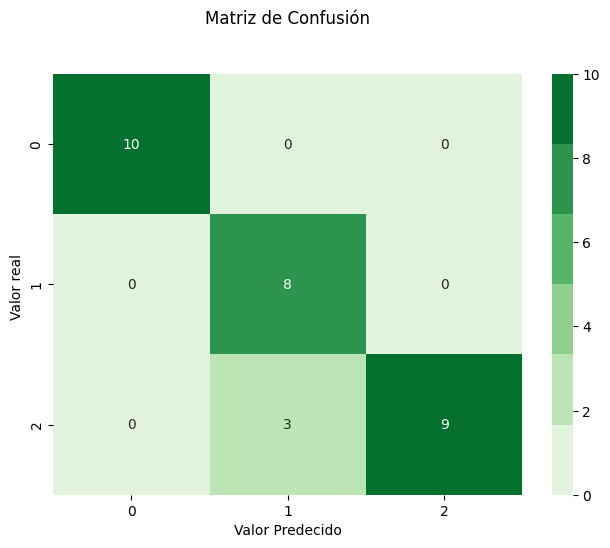

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt

valores_pred = NVG.predict (x_test)
print(f'EI score de la precision es de {metrics.accuracy_score(y_test,valores_pred) }' )
cnf_matrix = metrics. confusion_matrix(y_test, valores_pred)
colormap = sns.color_palette("Greens") 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=colormap,fmt='g')

plt.tight_layout()
plt.title( 'Matriz de Confusión', y=1.1)
plt.ylabel( 'Valor real ' )
plt.xlabel( 'Valor Predecido' )